In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the image data to values between 0 and 1
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# One-hot encode the labels
train_labels = to_categorical(train_labels, num_classes=10)
test_labels = to_categorical(test_labels, num_classes=10)

# Reshape the data to add a channel dimension (for grayscale images)
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

# Build the CNN model
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.2))

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10, batch_size=128, validation_data=(test_images, test_labels))

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_accuracy}")


Epoch 1/10
469/469 [==============================] - 179s 380ms/step - loss: 2.2968 - accuracy: 0.1463 - val_loss: 2.2869 - val_accuracy: 0.1136
Epoch 2/10
469/469 [==============================] - 177s 377ms/step - loss: 2.0220 - accuracy: 0.3468 - val_loss: 0.7770 - val_accuracy: 0.7866
Epoch 3/10
469/469 [==============================] - 181s 385ms/step - loss: 0.6460 - accuracy: 0.7915 - val_loss: 0.2680 - val_accuracy: 0.9210
Epoch 4/10
469/469 [==============================] - 178s 379ms/step - loss: 0.3433 - accuracy: 0.8937 - val_loss: 0.1665 - val_accuracy: 0.9473
Epoch 5/10
469/469 [==============================] - 177s 378ms/step - loss: 0.2455 - accuracy: 0.9232 - val_loss: 0.1195 - val_accuracy: 0.9624
Epoch 6/10
469/469 [==============================] - 182s 388ms/step - loss: 0.1973 - accuracy: 0.9384 - val_loss: 0.0983 - val_accuracy: 0.9686
Epoch 7/10
469/469 [==============================] - 179s 383ms/step - loss: 0.1700 - accuracy: 0.9476 - val_loss: 0.0883 -

In [6]:
# Predict the first 4 images of the test data
predictions = model.predict(test_images[:4])
predicted_labels = [tf.argmax(prediction).numpy() for prediction in predictions]

# labels of the first 4 images
actual_labels = [tf.argmax(label).numpy() for label in test_labels[:4]]
print("Predicted Labels:", predicted_labels)
print("Actual Labels:", actual_labels)


1/1 [==============================] - 0s 23ms/step
Predicted Labels: [7, 2, 1, 0]
Actual Labels: [7, 2, 1, 0]


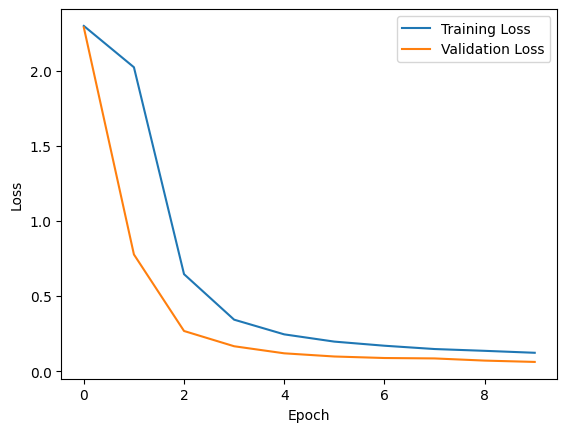

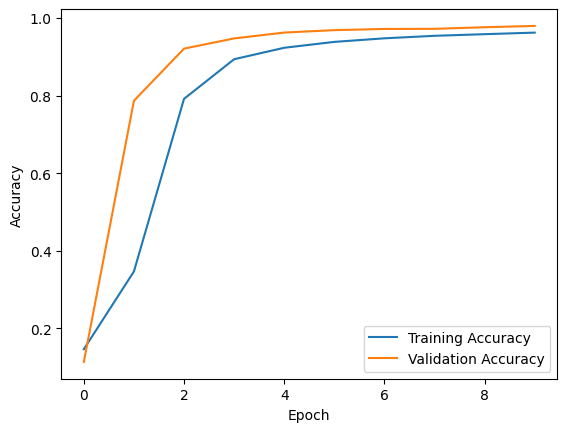

In [5]:
# Plot the training and validation loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
